<a href="https://colab.research.google.com/github/SanjeevRK21/Project-Stock_Risk_Analysis/blob/main/Stock_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance # main dataset for any stock related datas

In [11]:
# starting part if where we will connect our colab to our drive
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [4]:
# now i will create a folder Project_1 in drive
import os
project_path = '/content/drive/My drive/Project_1'
if not os.path.exists(project_path):

  os.makedirs(project_path)
  print('Created Project_1 folder')
else:
  print('Project_1 folder already exists')

Project_1 folder already exists


In [28]:
# now i will donwload the stock values and explicitely save 'Close' values in prices
import yfinance as yf
import pandas as pd

ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2024-01-01'

data = yf.download(ticker, start = start_date, end = end_date)
prices = data[['Close']].dropna()

# so basically here we are downloading the data of AAPL stock and saving Close coloumn values in prices.

/tmp/ipython-input-3000210127.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start = start_date, end = end_date)
[*********************100%***********************]  1 of 1 completed


TypeError: arg must be a list, tuple, 1-d array, or Series

In [10]:
# now the data saved in proces will be saved in a csv file names as raw_prices.csv and will be present in project_path
csv_path = f'{project_path}/raw_prices.csv'
prices.to_csv(csv_path)
print(f'the prices are saved in {csv_path}')
!ls "/content/drive/My drive/Project_1"

the prices are saved in /content/drive/My drive/Project_1/raw_prices.csv
raw_prices.csv


In [29]:
# now we compute for log values of the daily changes of the APPL Close price but the main thing we have to do is convert the Close values from object to numerics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

prices = pd.read_csv(csv_path, index_col = 0, parse_dates = True)
prices['Close'] = pd.to_numeric(prices['Close'], errors = 'coerce')
prices['log_returns'] = np.log((prices['Close'] / prices['Close'].shift(1)))
returns = prices['log_returns'].dropna()
returns.head()


/tmp/ipython-input-1858793137.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  prices = pd.read_csv(csv_path, index_col = 0, parse_dates = True)


,log_returns
Price,
2020-01-03,-0.009770
2020-01-06,0.007937
2020-01-07,-0.004714
2020-01-08,0.015959
2020-01-09,0.021018


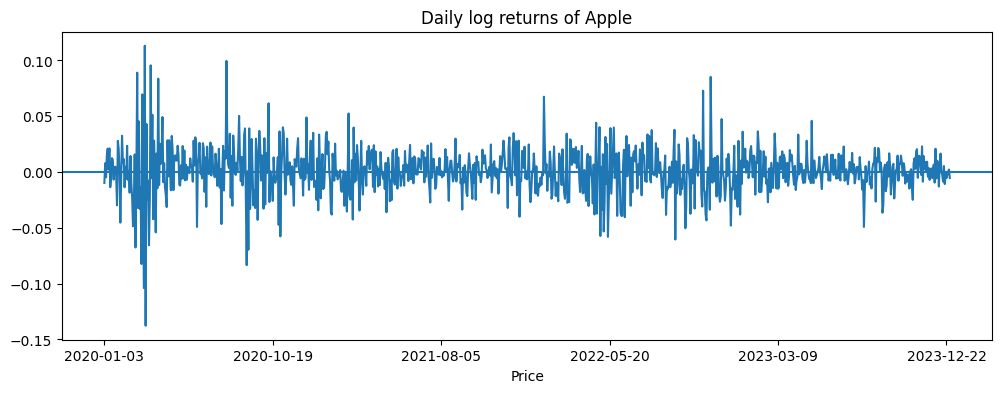

In [33]:
# Now lets plot a graph representing the change in Close values and save the log closing values in daily_log_returns
returns.plot(title = 'Daily log returns of Apple', figsize=(12,4))
plt.axhline(0)
returns.to_csv(f'{project_path}/daily_log_returns.csv')
print(f'the log returns file a been saved in {project_path} folder')